# **Insper - Eletromagnetismo e Ondulatória** #


**Projeto**



In [54]:
from cmath import *
from numpy import linalg
import numpy as np
import matplotlib.pyplot as plt

In [55]:
# Definindo valores dos capacitores e frequências analisados
Cs = [150*1e-9, 0.1*1e-6, 0.47*1e-6, 1e-6, 4.7*1e-6]
Cs_labels = ['150nF', '0.1uF', '0.47uF', '1uF', '4.7uF']
fs = np.arange(1, 100*1e3, 10)

# Definindo valores dos componentes
Rc = 20
k = 0.2
V1 = 3

c) Observe a função que criamos na célula abaixo. Tente explicar o que ela faz.

In [56]:
# Transoformador em série
# 19 é 1
def CalcularTransformadorSerie(Uf, c, f):
    # Capacitores 1 e 2
    C1 = c
    C2 = c
    
    # Indutâncias 1 e 2
    w = 2*np.pi*f
    L1 = 34.14*1e-6
    L2 = 34.61*1e-6

    # Resistência mínima das bobinas
    R1 = 0.181
    R2 = 0.163
    
    # Efeito pelicular das bobinas
    # R1 = R1 + (R1*f)/(1e5)
    # R2 = R2 + (R2*f)/(1e5)

    # Indutância mútua
    M = k * sqrt(L1 * L2)
    
    # Impedâncias
    XL1 = complex(0, w * L1)
    XL2 = complex(0, w * L2)
    XC1 = complex(0, -1/(w * C1))
    XC2 = complex(0, -1/(w * C2))
    XM = complex(0, w * M)
    
    # Matriz de impedâncias
    Z=np.array([
        [R1 + XL1 + XC1, -XM], 
        [-XM, XL2 + R2 + XC2 + Rc]])
    V=np.array([Uf,0])
    i=np.dot(linalg.inv(Z),V)
    
    # Retorna I1 e I2
    return i[0], i[1], L1


1.0


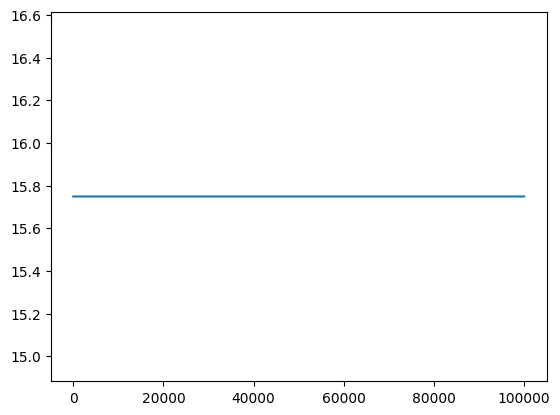

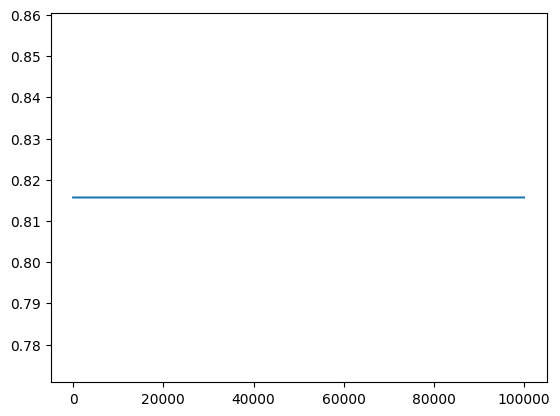

In [57]:
lista = []
lista_n = []
maior = 0
f_maior = 0
for f in fs:
    i1, i2, L1 = CalcularTransformadorSerie(V1, 150*1e-9, 70000)
    V2 = i2*Rc
    s1 = V1*i1.conjugate()/2
    s2 = V2*i2.conjugate()/2
    n = np.real(s2)/np.real(s1)
    
    lista_n.append(n)
    
    V2 = abs(i2*Rc)
    
    if maior < V2:
        maior = V2
        f_maior = f
    lista.append(V2)
    
    

print(f_maior)

plt.plot(fs, lista)
plt.show()

plt.plot(fs, lista_n)
plt.show()

In [58]:
i1, i2, L1 = CalcularTransformadorSerie(V1, 150*1e-9, 70000)

V2 = i2*Rc
s1 = V1*i1.conjugate()/2
s2 = V2*i2.conjugate()/2
n = np.real(s2)/np.real(s1)

print(f"i1: {abs(i1)}")
print(f"i2: {abs(i2)}")
print(f"L1: {L1}")
print(f"V2: {abs(V2)}")
print(f"s1: {s1}")
print(f"s2: {s2}")
print(f"n: {n*100}%")

i1: 5.234471553788463
i2: 0.7874355205700556
L1: 3.414e-05
V2: 15.74871041140111
s1: (7.601534347878146-1.966210457892326j)
s2: (6.2005469905543436+2.220446049250313e-16j)
n: 81.56967668356498%
